In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tempmatch as tm
from obspy import read, UTCDateTime as UTC
from obspy.signal import filter


In [2]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [3]:
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df = df.sort_values(by='time')

In [6]:
df['ones'] = 1

In [7]:
df.set_index('time', inplace=True)

In [9]:
df.to_csv('proposal/cumevents.csv')

Text(0, 0.5, 'cumulative number of events')

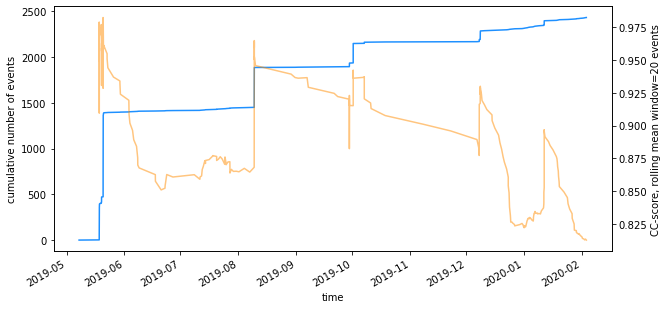

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')


# ax.plot

(-1.0, 2501.0)

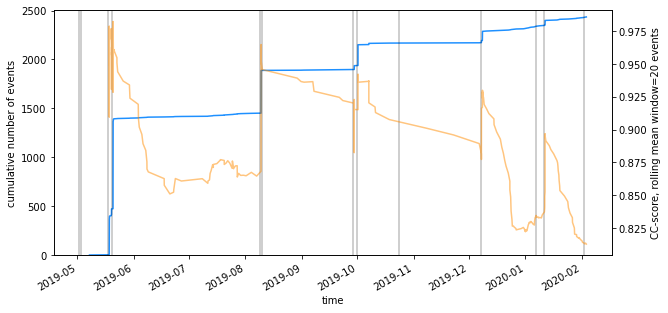

In [16]:
# For BA1B, the spectrogram stripes are on days:

# 2019: 122, 123, 138, 140, 221, 222, 272, 274, 297, 342
# 2020: 7, 10, 11, 33

fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')

days = dict(
day122 = pd.to_datetime('2019-05-02'),
day123 = pd.to_datetime('2019-05-03'),
day138 = pd.to_datetime('2019-05-18'),
day140 = pd.to_datetime('2019-05-20'),
day221 = pd.to_datetime('2019-08-09'),
day222 = pd.to_datetime('2019-08-10'),
day272 = pd.to_datetime('2019-09-29'),
day274 = pd.to_datetime('2019-10-01'),
day297 = pd.to_datetime('2019-10-24'),
day342 = pd.to_datetime('2019-12-08'),
day007 = pd.to_datetime('2020-01-07'),
day010 = pd.to_datetime('2020-01-11'),
day033 = pd.to_datetime('2020-02-02'),
)

for k in days.keys():
    ts = days[k]
    ax.plot([ts, ts], [-10, 2600], color='black', alpha=0.25)
    
ax.set_ylim(-1, 2501)

In [9]:
df.loc[(df.index>='2019-07-01')].head(10)

,similarity,template_id,ones
time,,,
2019-07-08 09:34:13.108000+00:00,0.933189,0,1
2019-07-11 09:29:58.394000+00:00,0.878823,0,1
2019-07-11 12:20:22.259000+00:00,0.841384,0,1
2019-07-12 07:46:42.843001+00:00,0.887582,0,1
2019-07-12 15:55:37.857001+00:00,0.973695,0,1
2019-07-13 05:23:24.879000+00:00,0.879718,0,1
2019-07-14 01:25:27.438000+00:00,0.940718,0,1
2019-07-14 09:52:50.645000+00:00,0.832540,0,1
2019-07-14 10:11:07.845000+00:00,0.872148,0,1


<AxesSubplot:xlabel='time'>

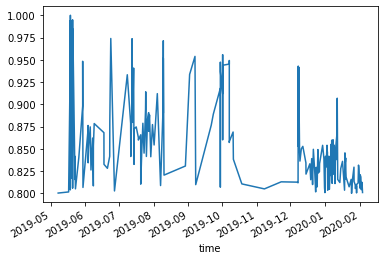

In [16]:
df.similarity.plot()

<AxesSubplot:>

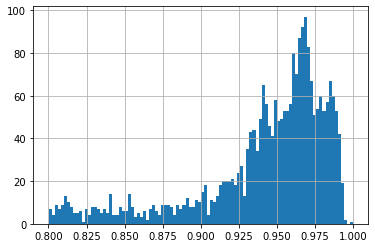

In [10]:
df.similarity.hist(bins=100)

In [11]:
nonevent = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.182')
nonevent += tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.182')


In [12]:
# nonevent[0].data = nonevent[0].data - nonevent[1].data

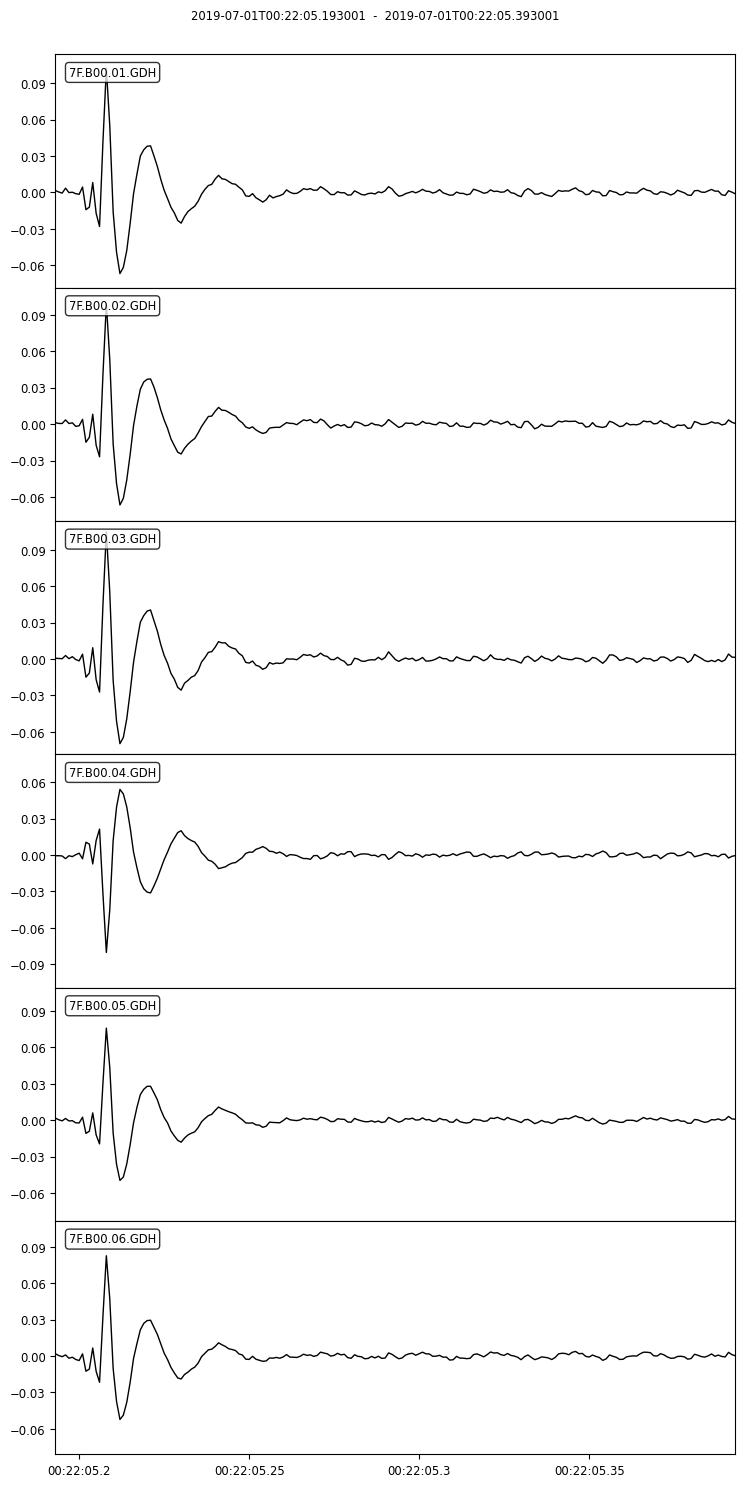

In [13]:
# starttime = UTC('2019-07-01 00:22:05.193001')
# starttime = UTC('2019-07-01 09:15:43.193001')
# starttime = UTC('2019-07-01 05:26:24.190001')
starttime = UTC('2019-07-01 14:24:45.202001')
starttime = UTC('2019-07-01 00:22:05.193001')

_ = nonevent.filter('highpass', freq=40).plot(starttime=starttime, endtime=starttime+0.2)

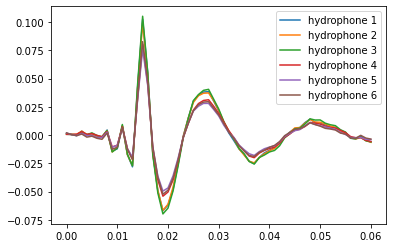

In [14]:
fig, ax = plt.subplots()

d = nonevent.copy()
d = d.trim(starttime=starttime, endtime=starttime+0.06)

d[3].data = d[3].data*-1

for tr in d:
    ax.plot(tr.times(), tr.data)
    
ax.legend(['hydrophone {n}'.format(n=n) for n in np.arange(0, len(d))+1])

In [15]:
days_count = df.groupby(pd.Grouper(freq='1D')).sum()
days_count[days_count.ones > 2]

,similarity,template_id,ones
time,,,
2019-05-18 00:00:00+00:00,382.135729,0,399
2019-05-19 00:00:00+00:00,67.581501,0,71
2019-05-20 00:00:00+00:00,877.377649,0,920
2019-05-29 00:00:00+00:00,2.653101,0,3
2019-06-03 00:00:00+00:00,3.433920,0,4
2019-06-08 00:00:00+00:00,2.540162,0,3
2019-07-14 00:00:00+00:00,2.645406,0,3
2019-07-20 00:00:00+00:00,2.505490,0,3
2019-07-27 00:00:00+00:00,3.513379,0,4
